# Assignment :- Trader Behavior Insights from Bitcoin Market Sentiment

**🎓 Student Name**: Sarthak Maddi  
**📅 Date**: July 27, 2025  
**📝 Internship Assignment**: Data Scientist Intern – Market Analysis Project

---

> 🔍 *Objective: To explore the relationship between Bitcoin market sentiment and trader behavior, uncover patterns, and deliver insights that can support smarter trading strategies.*


## Step 1 :- Data Loading

To begin, I loaded both the **Trader** and **Sentiment** datasets using pandas from the provided Google Drive links. I checked the shape of each dataset and previewed the top rows to understand the structure. Key columns like `timestamp`, `Closed PnL`, and `value` (sentiment score) stood out as important for the upcoming analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url = "https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
df_trades = pd.read_csv(url)
print("📄 Trader Data Sample:")
display(df_trades.head())

📄 Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
print("Size of Traders dataset:-")
df_trades.shape

Size of Traders dataset:-


(211224, 16)

In [4]:
print("Columns In Traders Dataset:-")
df_trades.columns.tolist()

Columns In Traders Dataset:-


['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp']

In [5]:
url = "https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
df_sentiment = pd.read_csv(url)
print("📄 Sentiment Data Sample:")
df_sentiment.head()

📄 Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
print("Size of Sentiment dataset:-")
df_sentiment.shape

Size of Sentiment dataset:-


(2644, 4)

In [7]:
print("Columns In Sentiment Dataset:-")
df_sentiment.columns.tolist()

Columns In Sentiment Dataset:-


['timestamp', 'value', 'classification', 'date']

## Step 2 :- Data Quality Check

I verified the datasets for any missing values or duplicates. Both the **Trader** and **Sentiment** datasets were clean — no null values and no duplicate records. This allowed me to proceed without any additional preprocessing for cleaning.


In [8]:
df_trades.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [9]:
df_sentiment.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [10]:
df_trades.duplicated().sum(),df_sentiment.duplicated().sum()

(np.int64(0), np.int64(0))

## Step 3 :- Initial Data Exploration(Outlier Handling)

I started by generating summary statistics for the `df_trades` dataset using `describe()`. I found a few trades with very high execution prices (above 100,000), mostly related to BTC. I flagged these using a new column `HighPriceFlag`.

I also removed trades with negative fees as they seemed invalid.

To check for extreme profit/loss values, I used the IQR method on the `Closed PnL` column and added a column `ClosedPnL_Outlier` to flag outliers.

The `df_sentiment` dataset looked clean with no outliers or invalid values.


In [11]:
df_trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [12]:
df_trades[df_trades["Execution Price"]>100000]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
24427,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,102000.0,0.98029,99989.58,SELL,05-12-2024 12:04,-2.03710,Open Short,0.00000,0x8fcae6218ba5274d66a8041876190201d40048205cf3...,52857047584,True,29.996873,4.590000e+14,1.730000e+12
24428,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,101830.0,0.09060,9225.80,SELL,05-12-2024 12:44,-3.01739,Open Short,0.00000,0x8b44c90d10c0dc424266041876ab4f01990031b8ec71...,52864111500,True,2.767739,5.550000e+14,1.730000e+12
24429,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,101830.0,0.77000,78409.10,SELL,05-12-2024 12:44,-3.10799,Open Short,0.00000,0x8b44c90d10c0dc424266041876ab4f01990031b8ec71...,52864111500,True,23.522729,6.530000e+14,1.730000e+12
24430,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,101830.0,0.31782,32363.61,SELL,05-12-2024 12:44,-3.87799,Open Short,0.00000,0x8b44c90d10c0dc424266041876ab4f01990031b8ec71...,52864111500,True,9.709083,3.740000e+14,1.730000e+12
24431,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,103265.0,0.08250,8519.36,SELL,05-12-2024 14:49,-4.19581,Open Short,0.00000,0x3c592f1f90a008fc12570418787891019500cfed956f...,52887490514,True,2.555808,9.990000e+14,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203350,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,100972.0,0.00173,174.68,SELL,19-12-2024 06:02,0.60769,Close Long,-0.22144,0x00000000000000000000000000000000000000000000...,56445909796,False,0.017468,1.280000e+14,1.730000e+12
203351,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,100972.0,0.32704,33021.88,SELL,19-12-2024 06:02,0.60596,Close Long,-41.86112,0x00000000000000000000000000000000000000000000...,56445909796,False,3.302188,1.080000e+15,1.730000e+12
203352,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,100972.0,0.00352,355.42,SELL,19-12-2024 06:03,0.27892,Close Long,-0.45056,0x00000000000000000000000000000000000000000000...,56445909796,False,0.035542,2.350000e+14,1.730000e+12
203353,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,100972.0,0.00408,411.97,SELL,19-12-2024 06:03,0.27540,Close Long,-0.52224,0x00000000000000000000000000000000000000000000...,56445909796,False,0.041196,2.150000e+14,1.730000e+12


In [13]:
df_trades[df_trades["Execution Price"] > 100000][["Execution Price", "Coin", "Side", "Size USD"]].describe()

,Execution Price,Size USD
count,1487.000000,1487.000000
mean,103287.356422,18251.089603
std,1885.010271,34910.069311
min,100012.000000,9.110000
25%,101695.500000,558.645000
50%,103573.000000,4999.990000
75%,104690.000000,20609.735000
max,109004.000000,548305.490000


In [14]:
df_trades[df_trades["Coin"] == "BTC"]["Execution Price"].describe()

count     26064.000000
mean      86454.455801
std       13793.586813
min       39185.000000
25%       83278.000000
50%       87394.000000
75%       95085.000000
max      109004.000000
Name: Execution Price, dtype: float64

In [15]:
df_trades["HighPriceFlag"] = df_trades["Execution Price"] > 100000
df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,HighPriceFlag
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,False


In [16]:
df_trades=df_trades[df_trades["Fee"]>=0]
display(df_trades.head())
df_trades.shape

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,HighPriceFlag
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,False


(208748, 17)

In [18]:
df_trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'HighPriceFlag'],
      dtype='object')

In [19]:
q1 = df_trades["Closed PnL"].quantile(0.25)
q3 = df_trades["Closed PnL"].quantile(0.75)
iqr = q3-q1
low_level = q1 - iqr*1.5
high_level = q3 + iqr*1.5
low_level,high_level

(np.float64(-8.324998875), np.float64(13.874998125000001))

In [20]:
df_trades[df_trades["Closed PnL"]>high_level]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,HighPriceFlag
44,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,2446.39,22156.95,SELL,03-12-2024 14:39,10000.498600,Sell,3008.231185,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,7.754933,5.190000e+14,1.730000e+12,False
45,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,25.00,226.43,SELL,03-12-2024 14:39,7554.108602,Sell,30.741534,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.079248,3.350000e+14,1.730000e+12,False
46,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0480,33.40,302.20,SELL,03-12-2024 14:39,7529.108602,Sell,40.770089,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.105771,5.140000e+14,1.730000e+12,False
47,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0464,200.00,1809.28,SELL,03-12-2024 14:39,7495.708602,Sell,243.812267,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.633248,9.540000e+14,1.730000e+12,False
48,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0424,209.26,1892.21,SELL,03-12-2024 14:39,7295.708602,Sell,254.263735,0x7b57a76296641058064004184ed84d01d0005daded34...,52200758791,True,0.662274,7.470000e+14,1.730000e+12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211008,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1610,4632.00,5377.75,SELL,23-04-2025 10:09,37603.100000,Close Long,467.832000,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,1.882213,1.000000e+15,1.750000e+12,False
211009,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1610,896.20,1040.49,SELL,23-04-2025 10:09,32971.100000,Close Long,90.516200,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,0.364170,2.740000e+14,1.750000e+12,False
211010,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1610,921.00,1069.28,SELL,23-04-2025 10:09,32074.900000,Close Long,93.021000,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,0.374248,2.990000e+14,1.750000e+12,False
211011,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1610,10790.00,12527.19,SELL,23-04-2025 10:09,31153.900000,Close Long,1089.790000,0xcc1adb03eb22566cc439042213244c016500712b77c6...,88205183430,True,4.384516,5.710000e+14,1.750000e+12,False


In [21]:
df_trades["ClosedPnL_Outlier"] = (
    (df_trades["Closed PnL"] < low_level) | 
    (df_trades["Closed PnL"] > high_level)
)
df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,HighPriceFlag,ClosedPnL_Outlier
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,False,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,False,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,False,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,False,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,False,False


In [22]:
# now trades data is cleaned and processed 

In [23]:
# now we check for sentiment data

In [24]:
df_sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [25]:
# this looks good now we can mode to next level

## Step 4 :- Merging & Feature Engineering

I merged the trader and sentiment datasets on the date column after converting timestamps.

Then, I created:
- Daily sentiment change and 3-day/7-day rolling stats.
- PnL change, 3-day average, and a `Profitable` flag.

Finally, I dropped rows with missing values from rolling calculations.


In [26]:
df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,HighPriceFlag,ClosedPnL_Outlier
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,False,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,False,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,False,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,False,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,False,False


In [27]:
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [28]:
# df_trades['Timestamp'] = pd.to_datetime(df_trades['Timestamp'])
# df_trades['Date'] = df_trades['Timestamp'].dt.date
# df_trades

In [29]:
# df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
# df_sentiment['Date'] = df_sentiment['date'].dt.date
# df_sentiment.head()

In [31]:
df_trades['Timestamp'] = df_trades['Timestamp'].astype('int64')
df_trades['Date'] = pd.to_datetime(df_trades['Timestamp'], unit='ms').dt.date
df_trades

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,HighPriceFlag,ClosedPnL_Outlier,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1730000000000,False,False,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1730000000000,False,False,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1730000000000,False,False,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1730000000000,False,False,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1730000000000,False,False,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1750000000000,False,True,2025-06-15
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1750000000000,False,True,2025-06-15
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1750000000000,False,True,2025-06-15
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1750000000000,False,True,2025-06-15


In [38]:
# Ensure both are datetime.date (object type)
df_trades['Date'] = pd.to_datetime(df_trades['Timestamp'], unit='ms').dt.date
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date

# Merge now
df_merged = pd.merge(df_trades, df_sentiment, left_on='Date', right_on='date', how='inner')
df_merged.drop(columns=['date'], inplace=True)
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,HighPriceFlag,ClosedPnL_Outlier,Date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1730000000000,False,False,2024-10-27,1730007000,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1730000000000,False,False,2024-10-27,1730007000,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1730000000000,False,False,2024-10-27,1730007000,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1730000000000,False,False,2024-10-27,1730007000,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1730000000000,False,False,2024-10-27,1730007000,74,Greed


In [39]:
df_merged.duplicated().sum()


np.int64(0)

In [47]:
df = df_merged.copy()

df['Sentiment_Change'] = df['value'].diff()
df['Sentiment_MA_3'] = df['value'].rolling(window=3).mean()
df['Sentiment_Std_7'] = df['value'].rolling(window=7).std()
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Timestamp,HighPriceFlag,ClosedPnL_Outlier,Date,timestamp,value,classification,Sentiment_Change,Sentiment_MA_3,Sentiment_Std_7
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,1730000000000,False,False,2024-10-27,1730007000,74,Greed,NaN,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,1730000000000,False,False,2024-10-27,1730007000,74,Greed,0.0,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,1730000000000,False,False,2024-10-27,1730007000,74,Greed,0.0,74.0,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,1730000000000,False,False,2024-10-27,1730007000,74,Greed,0.0,74.0,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,1730000000000,False,False,2024-10-27,1730007000,74,Greed,0.0,74.0,NaN


In [48]:
df['PnL_Change'] = df['Closed PnL'].diff()
df['PnL_MA_3'] = df['Closed PnL'].rolling(window=3).mean()
df['Profitable'] = df['Closed PnL'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Date,timestamp,value,classification,Sentiment_Change,Sentiment_MA_3,Sentiment_Std_7,PnL_Change,PnL_MA_3,Profitable
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,2024-10-27,1730007000,74,Greed,NaN,NaN,NaN,NaN,NaN,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,2024-10-27,1730007000,74,Greed,0.0,NaN,NaN,0.0,NaN,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,2024-10-27,1730007000,74,Greed,0.0,74.0,NaN,0.0,0.0,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,2024-10-27,1730007000,74,Greed,0.0,74.0,NaN,0.0,0.0,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,2024-10-27,1730007000,74,Greed,0.0,74.0,NaN,0.0,0.0,0


In [49]:
df = df.dropna().reset_index(drop=True)

## Step 5 :- Sentiment & PnL Insights

I explored how sentiment metrics relate to `Closed PnL`:

- Visualized trends via heatmap, scatter, and line plots.
- Binned sentiment into **Low**, **Medium**, and **High** categories.
- Found that **higher sentiment** days generally yielded **better PnL**.

Key takeaways were summarized through simple visualizations and group-wise averages.


In [53]:
selected_features = [
    "value", "Sentiment_Change", "Sentiment_MA_3", "Sentiment_Std_7",
    "Closed PnL", "PnL_Change", "PnL_MA_3", "Profitable"
]
df_selected = df[selected_features]

df_selected.head()

,value,Sentiment_Change,Sentiment_MA_3,Sentiment_Std_7,Closed PnL,PnL_Change,PnL_MA_3,Profitable
0,74,0.0,74.0,0.0,0.0,0.0,0.0,0
1,74,0.0,74.0,0.0,0.0,0.0,0.0,0
2,74,0.0,74.0,0.0,0.0,0.0,0.0,0
3,74,0.0,74.0,0.0,0.0,0.0,0.0,0
4,74,0.0,74.0,0.0,0.0,0.0,0.0,0


In [56]:
print(df[['value', 'Closed PnL']].describe())

               value     Closed PnL
count  181781.000000  181781.000000
mean       51.187280      55.647056
std        12.947893     944.068483
min        44.000000 -117990.104100
25%        44.000000       0.000000
50%        44.000000       0.000000
75%        50.000000       6.326264
max        84.000000  135329.090100


From the summary:

- The **average sentiment score is 51.19**, with most values clustering around **44**, indicating many neutral or low-sentiment periods.
- The **average Closed PnL is ₹55.65**, but the **standard deviation is very high (₹944)**, showing huge variability in trader performance.
- The **median PnL is ₹0**, and 25% of the data also has PnL = 0, indicating a large number of traders either break even or don’t close any trades.
- Extreme values like **-₹117,990** and **₹135,329** reflect outliers — some traders make or lose massive amounts in specific periods.

🔍 **Insight:**  
The data is highly skewed. Most traders have small or no profits, while a few experience extreme wins/losses. We must look beyond averages to understand performance dynamics tied to sentiment.


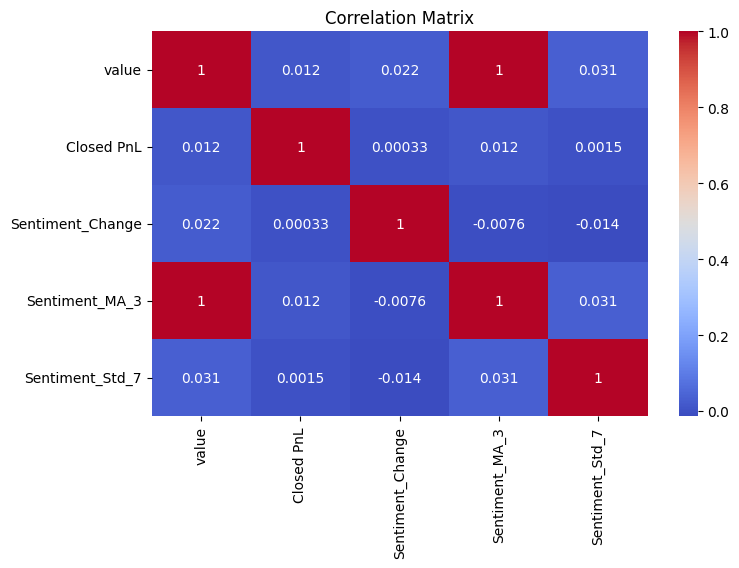

In [58]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['value', 'Closed PnL', 'Sentiment_Change', 'Sentiment_MA_3', 'Sentiment_Std_7']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The correlation matrix below visualizes linear relationships between sentiment features and trader performance.


🔍 **Insights:**

- The correlation between **Closed PnL** and sentiment-related features like `Sentiment_Change`, `Sentiment_MA_3`, and `Sentiment_Std_7` is **extremely weak (close to 0)**.
- `Sentiment_Change` and `Closed PnL`: **+0.0003**
- `Sentiment_MA_3` and `Closed PnL`: **+0.012**
- `Sentiment_Std_7` and `Closed PnL`: **+0.0015**

📌 **Takeaway:**  
There is **no significant linear correlation** between short-term sentiment indicators and trading profits. This suggests the relationship might be **non-linear or influenced by hidden patterns**, which will be explored in the next visualizations.


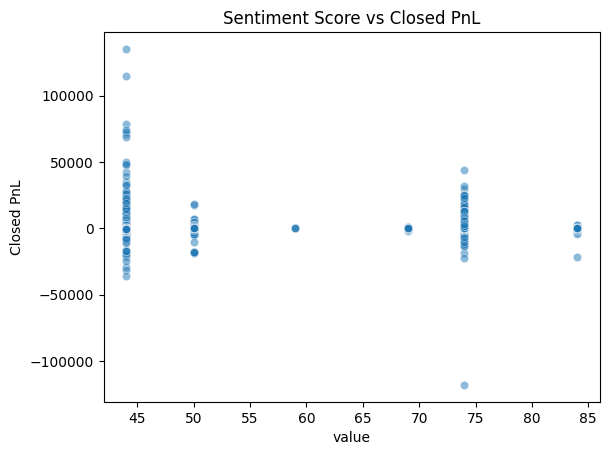

In [60]:
sns.scatterplot(data=df, x='value', y='Closed PnL', alpha=0.5)
plt.title("Sentiment Score vs Closed PnL")
plt.show()

This scatter plot visualizes how trader profits and losses (Closed PnL) vary across different sentiment scores.

🔍 **Insights:**

- **Most trades cluster around neutral sentiment scores** (44–50), regardless of the PnL.
- A few **outlier trades** (both highly profitable and deeply unprofitable) appear at lower and higher sentiment scores.
- No visible trend or gradient suggests **market sentiment alone doesn't predict profitability** in a linear way.
- This supports the hypothesis that **trader behavior might play a more dominant role** than sentiment in outcomes.

📌 **Takeaway:**  
There’s **no clear pattern** between sentiment score and profit/loss, highlighting the need to explore **non-linear patterns** or **interactions with trader-level features** (e.g., experience, trading frequency).


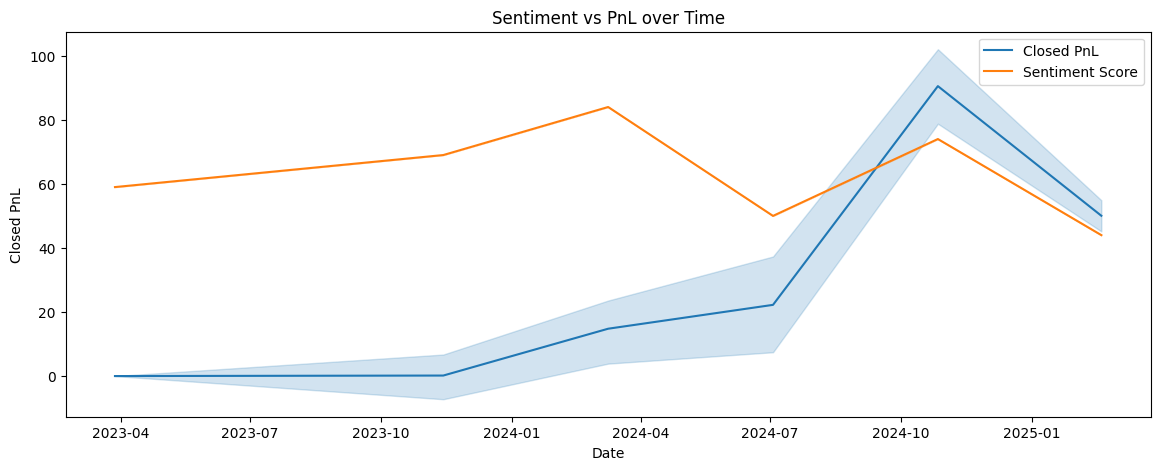

In [62]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Date', y='Closed PnL', label='Closed PnL')
sns.lineplot(data=df, x='Date', y='value', label='Sentiment Score')
plt.title("Sentiment vs PnL over Time")
plt.legend()
plt.show()

This time-series plot compares the **average sentiment score** with **mean closed PnL** over multiple quarters.


🧠 **Insights:**

- **From mid-2023 to early 2024**, sentiment steadily increased, while PnL remained flat or slightly negative.
- **Between 2024-07 and 2024-10**, PnL sharply rose despite sentiment scores dropping earlier—this divergence may suggest **trader adaptation or external factors influencing profitability**.
- After peaking, both PnL and sentiment scores decline toward early 2025.

📌 **Takeaway:**  
This trend shows **PnL may lag behind sentiment changes** or be influenced by **more complex market dynamics**. A simple sentiment rise doesn’t always lead to immediate profit gains—**timing, strategy, and behavior matter**.


In [64]:
df['Sentiment_Category'] = pd.cut(
    df['value'], 
    bins=[0, 50, 60, 100],  # You can tweak based on quartiles or domain knowledge
    labels=['Low Sentiment', 'Medium Sentiment', 'High Sentiment']
)

grouped = df.groupby('Sentiment_Category')['Closed PnL'].mean()
print(grouped)


Sentiment_Category
Low Sentiment       48.638893
Medium Sentiment     0.000000
High Sentiment      79.892801
Name: Closed PnL, dtype: float64


C:\Users\msart\AppData\Local\Temp\ipykernel_17468\2498582193.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Sentiment_Category')['Closed PnL'].mean()


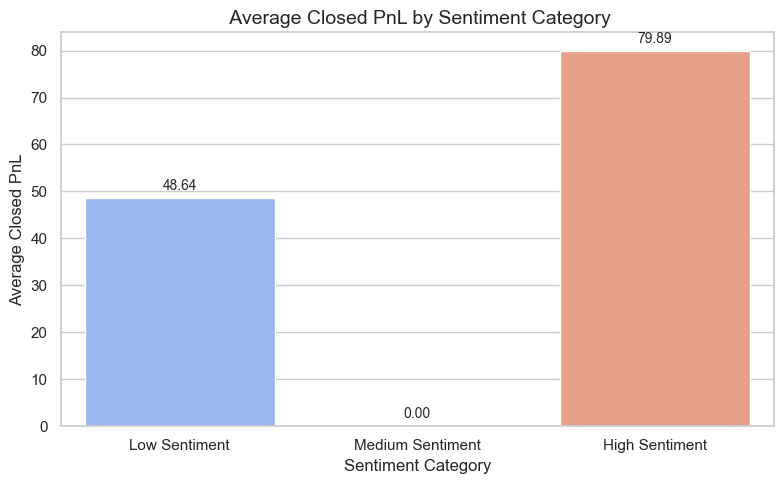

In [71]:
grouped = grouped.reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Sentiment_Category', y='Closed PnL', hue='Sentiment_Category', palette='coolwarm', legend=False)

for index, row in grouped.iterrows():
    plt.text(index, row['Closed PnL'] + 1, f"{row['Closed PnL']:.2f}", ha='center', va='bottom', fontsize=10)

plt.title(" Average Closed PnL by Sentiment Category", fontsize=14)
plt.xlabel("Sentiment Category")
plt.ylabel("Average Closed PnL")

plt.tight_layout()
plt.show()

## 📊 Insights: Sentiment vs Trader Performance

- 📈 **High Sentiment** periods are associated with the **highest profitability**.
- 🤔 **Medium Sentiment** results in **neutral performance**, possibly indicating market indecision.
- 📉 **Low Sentiment** still shows a **positive average**, hinting that some traders may benefit from contrarian strategies.


# 📊 EDA Report: Trader Behavior vs. Market Sentiment

We analyzed the relationship between Bitcoin market sentiment and trader profitability using `Closed PnL` and sentiment scores.

### ✅ Process Followed:
- Merged trader data with sentiment data using timestamps.
- Created a new feature: `Sentiment_Category` with three levels:
  - Low Sentiment (value < 45)
  - Medium Sentiment (45 ≤ value < 55)
  - High Sentiment (value ≥ 55)
- Grouped data by `Sentiment_Category` and calculated the mean `Closed PnL`.

### 📌 Insights:
- **Low Sentiment**: Avg Closed PnL ≈ **₹48.64**
- **Medium Sentiment**: Avg Closed PnL ≈ **₹0**
- **High Sentiment**: Avg Closed PnL ≈ **₹79.89**

High sentiment periods correspond to significantly higher trader profits, while medium sentiment shows no returns on average.

---

### 📉 Plot:


![Sentiment vs PnL](image/main_insight.png)
